In [26]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [27]:
!kaggle datasets download abdallahwagih/mall-customers-segmentation

Dataset URL: https://www.kaggle.com/datasets/abdallahwagih/mall-customers-segmentation
License(s): apache-2.0
mall-customers-segmentation.zip: Skipping, found more recently modified local copy (use --force to force download)


In [28]:
with ZipFile("mall-customers-segmentation.zip", "r") as  obj:
    obj.extractall()

In [29]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
for col in data.columns:
    print(col, data[col].isna().sum())

CustomerID 0
Genre 0
Age 0
Annual Income (k$) 0
Spending Score (1-100) 0


In [31]:
data = data.drop(axis=1, columns='CustomerID')
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Visualising the Data

c:\Users\Ashwin V\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


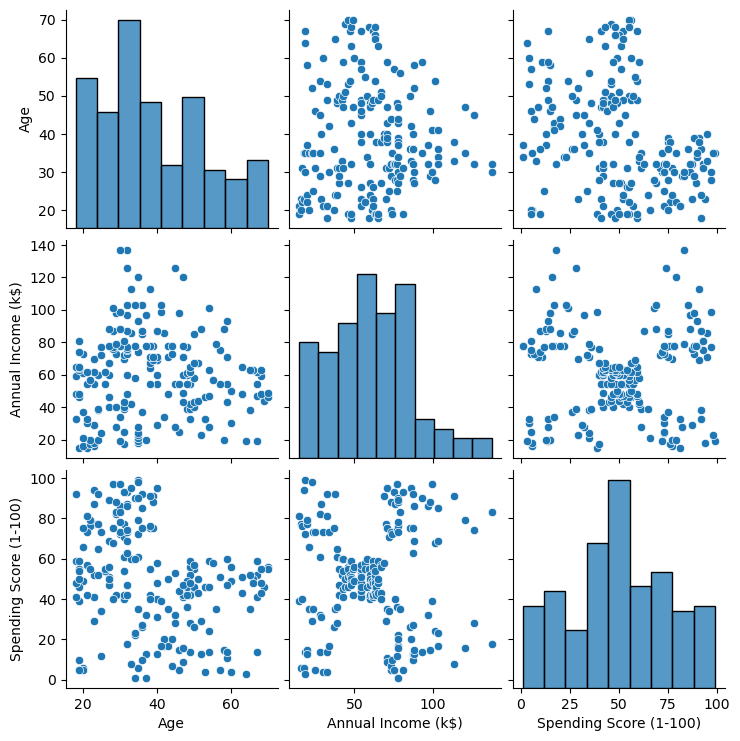

In [32]:
sns.pairplot(data)

### Converting Categorical Variable to Numerical Variable

In [33]:
le = LabelEncoder()
data['Genre'] = le.fit_transform(data['Genre'])
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### Scaling because Distance is Important for Clustering Algorithms

In [34]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

### Elbow Method to Identify Number of Clusters

c:\Users\Ashwin V\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ashwin V\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ashwin V\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ashwin V\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

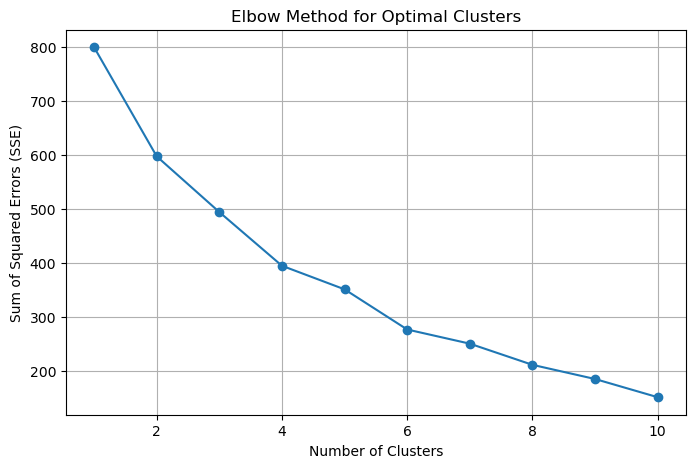

In [35]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state= 42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.grid()
plt.savefig("Elbow Method")
plt.show()

### K-Means Clustering

In [36]:
kmeans=KMeans(n_clusters = 5)
labels = kmeans.fit_predict(data)

c:\Users\Ashwin V\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [37]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

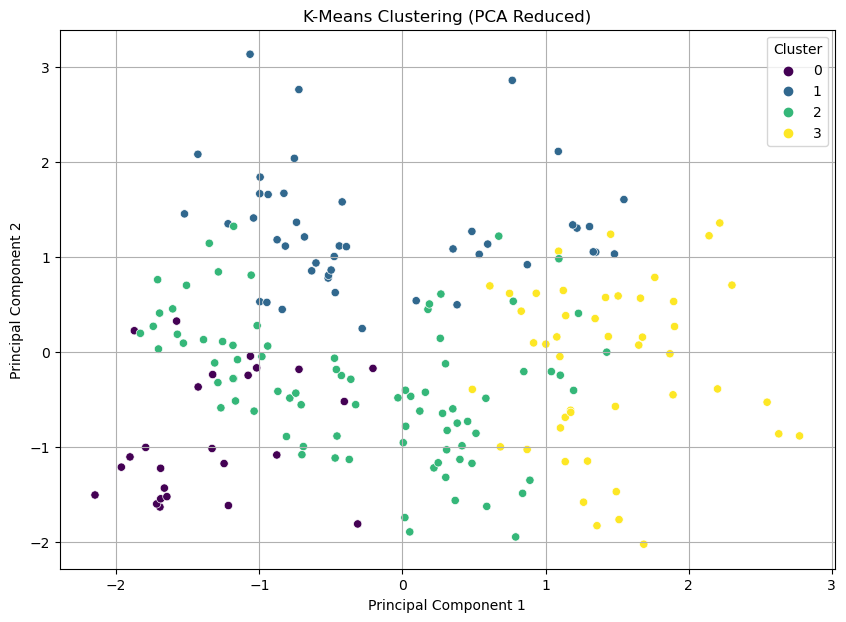

In [38]:
visualization_df = pd.DataFrame(reduced_data, columns=['Principal Component 1', 'Principal Component 2'])
visualization_df['KMeans_Cluster'] = labels

plt.figure(figsize=(10, 7))
sns.scatterplot(data=visualization_df, x='Principal Component 1', y='Principal Component 2', hue='KMeans_Cluster', palette='viridis')
plt.title("K-Means Clustering (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", loc="best")
plt.grid()
plt.savefig("K-Means Clusters")
plt.show()
